In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from tqdm import tqdm
from pprint import pprint
%matplotlib inline


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold, train_test_split, cross_validate, cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [2]:
df20t= pd.read_csv('./Data/2020_Team_DVOA_Ratings_Overall.csv')

df20t['Team']

0      NO
1      TB
2      GB
3     BUF
4     SEA
5      KC
6     BAL
7     PIT
8     LAR
9     IND
10     SF
11    MIA
12    ARI
13    TEN
14    CHI
15    WAS
16    ATL
17    CLE
18     LV
19    MIN
20    CAR
21     NE
22    DAL
23    HOU
24    NYG
25    LAC
26    DET
27    PHI
28    DEN
29    CIN
30    JAX
31    NYJ
Name: Team, dtype: object

In [3]:
df20t1c= pd.read_csv('./Data/2020_Team_DVOA_Ratings_ Overall_ after_Week_1_convert.csv')
df20t1c.dtypes

Team                                  object
W-L                                  float64
TotalDVOARankteam1                   float64
TotalDVOAteam1                       float64
WeightedDVOARankteam1                float64
WeightedDVOAteam1                    float64
OffenseDVOARankteam1                 float64
Offense DVOAteam1                    float64
OffenseWeightedDVOARankteam1         float64
OffenseWeightedDVOAteam1             float64
DefenseDVOARankteam1                 float64
DefenseDVOAteam1                     float64
DefenseWeightedDVOARankteam1         float64
DefenseWeightedDVOAteam1             float64
SpecialTeamsDVOARankteam1            float64
Special Teams DVOA                   float64
SpecialTeamsWeightedDVOARankteam1    float64
SpecialTeamsWeightedDVOAteam1        float64
Team 2                                object
W-L.1                                float64
Total DVOA Rank                      float64
Total DVOA                           float64
Weighted D

In [4]:

#df20t1c['TotalDVOAteam1']=df20t1c['TotalDVOAteam1'].astype('float64')
#df20t1c['TotalDVOAteam1']=pd.to_numeric(df20t1c['TotalDVOAteam1'], errors='coerce')
df20t1c['TotalDVOAteam1'].dtypes

dtype('float64')

In [5]:
df20t1c['TotalDVOAteam1'].describe()

count    32.000000
mean     -0.034594
std       0.356689
min      -1.076000
25%      -0.193250
50%      -0.031500
75%       0.115250
max       0.880000
Name: TotalDVOAteam1, dtype: float64

In [6]:
df20t1= pd.read_csv('./Data/2020_Team_DVOA_Ratings_ Overall_ after_Week_1.csv')
df20t1b=df20t1
#df20t1b=df20t1b.reindex(['19', '3', '21', '3', '23', '17', '29', '8', '7', '25', '15', '22', '30', '24', '16']) #,"10", '14','5', '27', '0', '28', '2', '11, "4", "13", "9", "31", "18", "20", "6", "12", "26"])
df20t1b  

,Team,W-L,Total DVOA Rank,Total DVOA,Weighted DVOA Rank,Weighted DVOA,Offense DVOA Rank,Offense DVOA,Offense Weighted DVOA Rank,Offense Weighted DVOA,Defense DVOA Rank,Defense DVOA,Defense Weighted DVOA Rank,Defense Weighted DVOA,Special Teams DVOA Rank,Special Teams DVOA,Special Teams Weighted DVOA Rank,Special Teams Weighted DVOA
0,BAL,1-0,1,88.0%,1,88.0%,1,39.9%,1,39.9%,3,-38.8%,3,-38.8%,2,9.4%,2,9.4%
1,NE,1-0,2,52.3%,2,52.3%,3,36.4%,3,36.4%,5,-23.8%,5,-23.8%,25,-7.9%,25,-7.9%
2,JAX,1-0,3,38.0%,3,38.0%,4,35.8%,4,35.8%,13,0.5%,13,0.5%,5,2.8%,5,2.8%
3,SEA,1-0,4,37.0%,4,37.0%,2,38.6%,2,38.6%,21,9.5%,21,9.5%,3,7.8%,3,7.8%
4,PIT,1-0,5,36.0%,5,36.0%,14,6.5%,14,6.5%,2,-39.0%,2,-39.0%,27,-9.4%,27,-9.4%
5,WAS,1-0,6,35.9%,6,35.9%,28,-32.7%,28,-32.7%,1,-69.4%,1,-69.4%,13,-0.8%,13,-0.8%
6,BUF,1-0,7,16.7%,7,16.7%,17,2.6%,17,2.6%,7,-19.0%,7,-19.0%,22,-4.8%,22,-4.8%
7,LV,1-0,8,13.7%,8,13.7%,5,31.7%,5,31.7%,23,16.5%,23,16.5%,15,-1.4%,15,-1.4%
8,NO,1-0,9,10.8%,9,10.8%,24,-13.7%,24,-13.7%,9,-14.3%,9,-14.3%,1,10.2%,1,10.2%
9,MIN,0-1,10,10.8%,10,10.8%,6,28.2%,6,28.2%,26,20.1%,26,20.1%,6,2.7%,6,2.7%


In [7]:
df20t2= pd.read_csv('./Data/2020_Team_DVOA_Ratings_Overall_after_Week_2.csv')
df20t2

,Team,W-L,Total DVOA Rank,Total DVOA,Weighted DVOA Rank,Weighted DVOA,Offense DVOA Rank,Offense DVOA,Offense Weighted DVOA Rank,Offense Weighted DVOA,Defense DVOA Rank,Defense DVOA,Defense Weighted DVOA Rank,Defense Weighted DVOA,Special Teams DVOA Rank,Special Teams DVOA,Special Teams Weighted DVOA Rank,Special Teams Weighted DVOA
0,BAL,2-0,1,60.6%,1,60.6%,5,23.3%,5,23.3%,3,-31.1%,3,-31.1%,3,6.2%,3,6.2%
1,SEA,2-0,2,34.1%,2,34.1%,2,34.9%,2,34.9%,24,9.9%,24,9.9%,1,9.1%,1,9.1%
2,PIT,2-0,3,32.4%,3,32.4%,14,-1.1%,14,-1.1%,2,-35.3%,2,-35.3%,19,-1.9%,19,-1.9%
3,GB,2-0,4,25.5%,4,25.5%,1,36.7%,1,36.7%,26,12.0%,26,12.0%,12,0.8%,12,0.8%
4,LAR,2-0,5,23.7%,5,23.7%,3,30.8%,3,30.8%,14,-1.4%,14,-1.4%,29,-8.5%,29,-8.5%
5,BUF,2-0,6,23.5%,6,23.5%,7,20.7%,7,20.7%,12,-5.0%,12,-5.0%,20,-2.2%,20,-2.2%
6,NO,1-1,7,18.6%,7,18.6%,12,6.5%,12,6.5%,10,-6.8%,10,-6.8%,4,5.3%,4,5.3%
7,IND,1-1,8,13.1%,8,13.1%,21,-6.6%,21,-6.6%,5,-18.2%,5,-18.2%,10,1.6%,10,1.6%
8,NE,1-1,9,11.7%,9,11.7%,4,27.5%,4,27.5%,19,6.9%,19,6.9%,30,-9.0%,30,-9.0%
9,KC,2-0,10,10.4%,10,10.4%,8,15.7%,8,15.7%,23,9.7%,23,9.7%,5,4.4%,5,4.4%


In [8]:
df20t2c= pd.read_csv('./Data/2020_Team_DVOA_Ratings_Overall_after_Week_2 _convert.csv')
df20t2c.describe()

,W-L,TotalDVOARankteam1,TotalDVOAteam1,WeightedDVOARankteam1,WeightedDVOAteam1,OffenseDVOARankteam1,Offense DVOAteam1,OffenseWeightedDVOARankteam1,OffenseWeightedDVOAteam1,DefenseDVOARankteam1,...,Offense Weighted DVOA,Defense DVOA Rank,Defense DVOA,Defense Weighted DVOA Rank,Defense Weighted DVOA,Special Teams DVOA Rank,Special Teams DVOA.1,Special Teams Weighted DVOA Rank,Special Teams Weighted DVOA,Home 1st team
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,...,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000
mean,0.500000,16.500000,-0.014438,16.500000,-0.014438,16.500000,-0.004000,16.500000,-0.004000,16.500000,...,-0.004000,16.500000,-0.002656,16.500000,-0.002656,16.500000,-0.013281,16.500000,-0.013281,0.500000
std,0.508001,9.380832,0.238518,9.380832,0.238518,9.380832,0.203596,9.380832,0.203596,9.380832,...,0.203596,9.380832,0.164600,9.380832,0.164600,9.380832,0.051492,9.380832,0.051492,0.508001
min,0.000000,1.000000,-0.429000,1.000000,-0.429000,1.000000,-0.376000,1.000000,-0.376000,1.000000,...,-0.376000,1.000000,-0.362000,1.000000,-0.362000,1.000000,-0.118000,1.000000,-0.118000,0.000000
25%,0.000000,8.750000,-0.213500,8.750000,-0.213500,8.750000,-0.127250,8.750000,-0.127250,8.750000,...,-0.127250,8.750000,-0.094250,8.750000,-0.094250,8.750000,-0.043500,8.750000,-0.043500,0.000000
50%,0.500000,16.500000,0.006000,16.500000,0.006000,16.500000,-0.017000,16.500000,-0.017000,16.500000,...,-0.017000,16.500000,-0.001000,16.500000,-0.001000,16.500000,-0.013500,16.500000,-0.013500,0.500000
75%,1.000000,24.250000,0.120500,24.250000,0.120500,24.250000,0.140500,24.250000,0.140500,24.250000,...,0.140500,24.250000,0.102750,24.250000,0.102750,24.250000,0.021500,24.250000,0.021500,1.000000
max,1.000000,32.000000,0.606000,32.000000,0.606000,32.000000,0.367000,32.000000,0.367000,32.000000,...,0.367000,32.000000,0.346000,32.000000,0.346000,32.000000,0.091000,32.000000,0.091000,1.000000


In [9]:
df20t3= pd.read_csv('./Data/2020_Team_DVOA_Ratings_Overall_after_Week_3.csv')
df20t3

,Team,W-L,Total DVOA Rank,Total DVOA,Weighted DVOA Rank,Weighted DVOA,Offense DVOA Rank,Offense DVOA,Offense Weighted DVOA Rank,Offense Weighted DVOA,Defense DVOA Rank,Defense DVOA,Defense Weighted DVOA Rank,Defense Weighted DVOA,Special Teams DVOA Rank,Special Teams DVOA,Special Teams Weighted DVOA Rank,Special Teams Weighted DVOA
0,IND,2-1,1,35.2%,1,35.2%,18,-0.7%,18,-0.7%,1,-32.3%,1,-32.3%,10,3.6%,10,3.6%
1,PIT,3-0,2,32.0%,2,32.0%,14,4.4%,14,4.4%,3,-26.9%,3,-26.9%,13,0.8%,13,0.8%
2,SF,2-1,3,30.1%,3,30.1%,8,11.3%,8,11.3%,5,-18.9%,5,-18.9%,15,-0.1%,15,-0.1%
3,SEA,3-0,4,26.7%,4,26.7%,3,27.3%,3,27.3%,23,7.3%,23,7.3%,2,6.8%,2,6.8%
4,TB,2-1,5,25.4%,5,25.4%,16,2.2%,16,2.2%,2,-28.6%,2,-28.6%,27,-5.4%,27,-5.4%
5,BAL,2-1,6,24.2%,6,24.2%,13,4.9%,13,4.9%,10,-4.8%,10,-4.8%,1,14.5%,1,14.5%
6,LAR,2-1,7,21.0%,7,21.0%,1,34.6%,1,34.6%,21,5.4%,21,5.4%,31,-8.1%,31,-8.1%
7,GB,3-0,8,20.4%,8,20.4%,2,27.8%,2,27.8%,28,11.7%,28,11.7%,7,4.4%,7,4.4%
8,KC,3-0,9,17.2%,9,17.2%,5,25.2%,5,25.2%,13,-0.1%,13,-0.1%,30,-8.1%,30,-8.1%
9,BUF,3-0,10,16.5%,10,16.5%,6,22.3%,6,22.3%,24,8.8%,24,8.8%,11,3.1%,11,3.1%


In [10]:
df20t3c= pd.read_csv('./Data/2020_Team_DVOA_Ratings_Overall_after_Week_3_convert.csv')
df20t3c.columns

Index(['Team', 'W-L', 'TotalDVOARankteam1', 'TotalDVOAteam1',
       'WeightedDVOARankteam1', 'WeightedDVOAteam1', 'OffenseDVOARankteam1',
       'Offense DVOAteam1', 'OffenseWeightedDVOARankteam1',
       'OffenseWeightedDVOAteam1', 'DefenseDVOARankteam1', 'DefenseDVOAteam1',
       'DefenseWeightedDVOARankteam1', 'DefenseWeightedDVOAteam1',
       'SpecialTeamsDVOARankteam1', 'Special Teams DVOA',
       'SpecialTeamsWeightedDVOARankteam1', 'SpecialTeamsWeightedDVOAteam1',
       'Team 2', 'W-L.1', 'Total DVOA Rank', 'Total DVOA',
       'Weighted DVOA Rank', 'Weighted DVOA', 'Offense DVOA Rank',
       'Offense DVOA', 'Offense Weighted DVOA Rank', 'Offense Weighted DVOA',
       'Defense DVOA Rank', 'Defense DVOA', 'Defense Weighted DVOA Rank',
       'Defense Weighted DVOA', 'Special Teams DVOA Rank',
       'Special Teams DVOA.1', 'Special Teams Weighted DVOA Rank',
       'Special Teams Weighted DVOA', 'Home 1st team'],
      dtype='object')

In [11]:
df20t3c.describe()

,W-L,TotalDVOARankteam1,TotalDVOAteam1,WeightedDVOARankteam1,WeightedDVOAteam1,OffenseDVOARankteam1,Offense DVOAteam1,OffenseWeightedDVOARankteam1,OffenseWeightedDVOAteam1,DefenseDVOARankteam1,...,Offense Weighted DVOA,Defense DVOA Rank,Defense DVOA,Defense Weighted DVOA Rank,Defense Weighted DVOA,Special Teams DVOA Rank,Special Teams DVOA.1,Special Teams Weighted DVOA Rank,Special Teams Weighted DVOA,Home 1st team
count,30.000000,30.00000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,...,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,0.500000,17.10000,-0.014400,17.10000,-0.014400,16.766667,-0.009567,16.766667,-0.009567,16.966667,...,-0.009567,16.966667,0.003200,16.966667,0.003200,16.566667,-0.001500,16.566667,-0.001500,0.500000
std,0.508548,9.27492,0.224066,9.27492,0.224066,9.629994,0.210108,9.629994,0.210108,9.356846,...,0.210108,9.356846,0.131675,9.356846,0.131675,9.672868,0.053222,9.672868,0.053222,0.508548
min,0.000000,1.00000,-0.507000,1.00000,-0.507000,1.000000,-0.430000,1.000000,-0.430000,1.000000,...,-0.430000,1.000000,-0.323000,1.000000,-0.323000,1.000000,-0.090000,1.000000,-0.090000,0.000000
25%,0.000000,9.25000,-0.116500,9.25000,-0.116500,8.250000,-0.089750,8.250000,-0.089750,9.250000,...,-0.089750,9.250000,-0.053250,9.250000,-0.053250,8.250000,-0.037750,8.250000,-0.037750,0.000000
50%,0.500000,17.50000,-0.041000,17.50000,-0.041000,17.500000,0.005500,17.500000,0.005500,17.500000,...,0.005500,17.500000,0.031000,17.500000,0.031000,16.500000,-0.007500,16.500000,-0.007500,0.500000
75%,1.000000,24.75000,0.170250,24.75000,0.170250,24.750000,0.107000,24.750000,0.107000,24.750000,...,0.107000,24.750000,0.090250,24.750000,0.090250,24.750000,0.037750,24.750000,0.037750,1.000000
max,1.000000,32.00000,0.352000,32.00000,0.352000,32.000000,0.346000,32.000000,0.346000,32.000000,...,0.346000,32.000000,0.201000,32.000000,0.201000,32.000000,0.145000,32.000000,0.145000,1.000000


In [72]:
df20t4= pd.read_csv('./Data/2020_Team_DVOA_Ratings_Overall_after_Week_4.csv')
df20t4b=df20t4
df20t4d=df20t4
df20t4b.describe()
# #put win loss
df20t4b=(df20t4b.drop(index=[4,16,23,30]))
df20t4b.describe()
df20t4b['W-L']=[0,0,1,0,1,
                1,1,0,0,1,
                1,0,1,0,1,
                0,1,0,1,1,
                1,1,1,0,0,
                0,0,0]
df20t4b.describe()
df20t4d=df20t4b
df20t4b.describe()
#Change column name
df20t4b=df20t4b.rename(columns={'Team':'Team', 'W-L':'W-L','Total DVOA Rank':'TotalDVOARankteam1', ' Total DVOA ':'TotalDVOAteam1','Weighted DVOA Rank':'WeightedDVOARankteam1','Weighted DVOA':'WeightedDVOAteam1', 'Offense DVOA Rank':'OffenseDVOARankteam1','Offense DVOA':'Offense DVOAteam1','Offense Weighted DVOA Rank':'OffenseWeightedDVOARankteam1','Offense Weighted DVOA':'OffenseWeightedDVOAteam1', 'Defense DVOA Rank':'DefenseDVOARankteam1','Defense DVOA':'DefenseDVOAteam1','Defense Weighted DVOA Rank':'DefenseWeightedDVOARankteam1', 'Defense Weighted DVOA':'DefenseWeightedDVOAteam1','Special Teams DVOA Rank':'SpecialTeamsDVOARankteam1', 'Special Teams DVOA': 'Special Teams DVOA','Special Teams Weighted DVOA Rank':'SpecialTeamsWeightedDVOARankteam1', 'Special Teams Weighted DVOA':'SpecialTeamsWeightedDVOAteam1'})
df20t4b.columns
df20t4b['Team 2']=['CHI', 'LV', 'CIN', 'CLE', 'MIN', 'PHI', 'LAC', 'MIA', 'TEN', 'WAS', 'IND', 'SEA', 'BUF', 'HOU', 'NYG', 'NO', 'ATL', 'BAL', 'JAX', 'TB', 'NYJ', 'KC', 'SF', 'CAR', 'LAR', 'ARI', 'PIT', 'DAL']
                                 
# ''Team', 'W-L', 'Total DVOA Rank', 'Total DVOA', 'Weighted DVOA Rank',
#        'Weighted DVOA', 'Offense DVOA Rank', 'Offense DVOA',
#        'Offense Weighted DVOA Rank', 'Offense Weighted DVOA',
#        'Defense DVOA Rank', 'Defense DVOA', 'Defense Weighted DVOA Rank',
#        'Defense Weighted DVOA',
#                                  'Special Teams DVOA Rank',
#                                    'Special Teams DVOA', 
#                                  'Special Teams Weighted DVOA Rank',
#                                'Special Teams Weighted DVOA'                               
                                
#                                  'Team', 'W-L', 'TotalDVOARankteam1', 'TotalDVOAteam1',
#        'WeightedDVOARankteam1', 'WeightedDVOAteam1', 'OffenseDVOARankteam1',
#        'Offense DVOAteam1', 'OffenseWeightedDVOARankteam1',
#        'OffenseWeightedDVOAteam1', 'DefenseDVOARankteam1', 'DefenseDVOAteam1',
#        'DefenseWeightedDVOARankteam1', 'DefenseWeightedDVOAteam1',
#        'SpecialTeamsDVOARankteam1', 'Special Teams DVOA',
#        'SpecialTeamsWeightedDVOARankteam1', 'SpecialTeamsWeightedDVOAteam1'
#change column name
df20t4d['Home 1st team']=[0,1,1,0,1,1,1,1,0,0,1,0,1,0,1,0,0,0,1,1,0,0,0,1,1,1,0,0]
#change win loss
df20t4d=df20t4d.rename(columns={'W-L':'W-L.1', 'Special Teams DVOA':'Special Teams DVOA.1', 'Team':'Team 2'})
#df20t4d['Team 2']=['CHI', 'LV', 'CIN', 'CLE', 'MIN', 'PHI', 'LAC', 'MIA', 'TEN', 'WAS', 'IND', 'SEA', 'BUF', 'HOU', 'NYG', 'NO', 'ATL', 'BAL', 'JAX', 'TB', 'NYJ', 'KC', 'SF', 'CAR', 'LAR', 'ARI', 'PIT', 'DAL']
df20t4d['W-L.1']=[1,1,0,1,0,0,0,1,1,0,0,1,0,1,0,1,0,1,0,0,0,0,0,1,1,1,1,1]
#add home field
#merge on  opponent team
df20t4c=pd.merge(df20t4b, df20t4d, how='outer' ,on=['Team 2'])

df20t4c.columns


Index(['Team', 'W-L', 'TotalDVOARankteam1', 'TotalDVOAteam1',
       'WeightedDVOARankteam1', 'WeightedDVOAteam1', 'OffenseDVOARankteam1',
       'Offense DVOAteam1', 'OffenseWeightedDVOARankteam1',
       'OffenseWeightedDVOAteam1', 'DefenseDVOARankteam1', 'DefenseDVOAteam1',
       'DefenseWeightedDVOARankteam1', 'DefenseWeightedDVOAteam1',
       'SpecialTeamsDVOARankteam1', 'Special Teams DVOA',
       'SpecialTeamsWeightedDVOARankteam1', 'SpecialTeamsWeightedDVOAteam1',
       'Team 2', 'W-L.1', 'Total DVOA Rank', ' Total DVOA ',
       'Weighted DVOA Rank', 'Weighted DVOA', 'Offense DVOA Rank',
       'Offense DVOA', 'Offense Weighted DVOA Rank', 'Offense Weighted DVOA',
       'Defense DVOA Rank', 'Defense DVOA', 'Defense Weighted DVOA Rank',
       'Defense Weighted DVOA', 'Special Teams DVOA Rank',
       'Special Teams DVOA.1', 'Special Teams Weighted DVOA Rank',
       'Special Teams Weighted DVOA', 'Home 1st team'],
      dtype='object')

In [67]:
df20t4c

,Team,W-L,TotalDVOARankteam1,TotalDVOAteam1,WeightedDVOARankteam1,WeightedDVOAteam1,OffenseDVOARankteam1,Offense DVOAteam1,OffenseWeightedDVOARankteam1,OffenseWeightedDVOAteam1,...,Offense Weighted DVOA,Defense DVOA Rank,Defense DVOA,Defense Weighted DVOA Rank,Defense Weighted DVOA,Special Teams DVOA Rank,Special Teams DVOA.1,Special Teams Weighted DVOA Rank,Special Teams Weighted DVOA,Home 1st team
0,TB,0,1.0,0.301,1.0,0.301,7.0,0.090,7.0,0.090,...,-0.155,7.0,-0.106,7.0,-0.106,30.0,-0.043,30.0,-0.043,1
1,KC,0,2.0,0.280,2.0,0.280,4.0,0.219,4.0,0.219,...,0.064,30.0,0.159,30.0,0.159,22.0,-0.023,22.0,-0.023,0
2,BAL,1,3.0,0.270,3.0,0.270,11.0,0.061,11.0,0.061,...,-0.098,16.0,0.008,16.0,0.008,7.0,0.042,7.0,0.042,0
3,IND,0,4.0,0.253,4.0,0.253,24.0,-0.055,24.0,-0.055,...,0.075,17.0,0.012,17.0,0.012,27.0,-0.038,27.0,-0.038,1
4,SEA,1,6.0,0.239,6.0,0.239,3.0,0.223,3.0,0.223,...,0.045,13.0,-0.007,13.0,-0.007,23.0,-0.027,23.0,-0.027,0
5,PIT,1,7.0,0.207,7.0,0.207,18.0,0.014,18.0,0.014,...,-0.342,14.0,-0.005,14.0,-0.005,8.0,0.040,8.0,0.040,0
6,NO,1,8.0,0.187,8.0,0.187,8.0,0.083,8.0,0.083,...,0.011,20.0,0.024,20.0,0.024,29.0,-0.040,29.0,-0.040,0
7,SF,0,9.0,0.170,9.0,0.170,15.0,0.048,15.0,0.048,...,-0.029,31.0,0.160,31.0,0.160,2.0,0.068,2.0,0.068,0
8,BUF,0,10.0,0.164,10.0,0.164,5.0,0.195,5.0,0.195,...,0.059,18.0,0.020,18.0,0.020,18.0,-0.016,18.0,-0.016,1
9,LAR,1,11.0,0.155,11.0,0.155,2.0,0.226,2.0,0.226,...,-0.283,4.0,-0.139,4.0,-0.139,24.0,-0.028,24.0,-0.028,1


In [13]:
df20t5= pd.read_csv('./Data/2020_Team_DVOA_Ratings_Overall_after_Week_5.csv')
df20t5

,Team,W-L,Total DVOA Rank,Total DVOA,Weighted DVOA Rank,Weighted DVOA,Offense DVOA Rank,Offense DVOA,Offense Weighted DVOA Rank,Offense Weighted DVOA,Defense DVOA Rank,Defense DVOA,Defense Weighted DVOA Rank,Defense Weighted DVOA,Special Teams DVOA Rank,Special Teams DVOA,Special Teams Weighted DVOA Rank,Special Teams Weighted DVOA
0,BAL,4-1,1,34.0%,1,34.0%,17,3.6%,17,3.6%,3,-19.0%,3,-19.0%,1,11.4%,1,11.4%
1,TB,3-2,2,26.8%,2,26.8%,11,7.2%,11,7.2%,2,-21.0%,2,-21.0%,20,-1.4%,20,-1.4%
2,SEA,5-0,3,25.8%,3,25.8%,3,23.6%,3,23.6%,19,3.4%,19,3.4%,4,5.7%,4,5.7%
3,LAR,4-1,4,24.4%,4,24.4%,4,21.8%,4,21.8%,8,-7.3%,8,-7.3%,29,-4.7%,29,-4.7%
4,KC,4-1,5,24.3%,5,24.3%,2,25.6%,2,25.6%,9,-4.0%,9,-4.0%,30,-5.3%,30,-5.3%
5,GB,4-0,6,24.0%,6,24.0%,1,31.2%,1,31.2%,29,10.2%,29,10.2%,8,3.0%,8,3.0%
6,IND,3-2,7,23.9%,7,23.9%,25,-9.2%,25,-9.2%,1,-24.4%,1,-24.4%,2,8.6%,2,8.6%
7,NO,3-2,8,18.4%,8,18.4%,16,4.4%,16,4.4%,6,-9.2%,6,-9.2%,5,4.8%,5,4.8%
8,PIT,4-0,9,16.7%,9,16.7%,13,6.0%,13,6.0%,7,-9.2%,7,-9.2%,11,1.6%,11,1.6%
9,TEN,4-0,10,15.7%,10,15.7%,5,12.7%,5,12.7%,12,-1.7%,12,-1.7%,12,1.3%,12,1.3%


In [85]:
df20t5= pd.read_csv('./Data/2020_Team_DVOA_Ratings_Overall_after_Week_5.csv')
df20t5b=df20t5
df20t5d=df20t5
#print(df20t5b['Team'])
#put win loss
df20t5b=(df20t5b.drop(index=[2,7,20,21]))
# df20t5b.describe()
df20t5b['W-L']=[1,1,0,1,0,
                1,1,1,0,0,
                1,0,0,0,0,
                1,1,0,1,1,
                1,0,0,0,1,
                0,1,0]
# # df20t5b.describe()
df20t5d=df20t5b
# # df20t5b.describe()
#  #Change column name
df20t5b=df20t5b.rename(columns={'Team':'Team', 'W-L':'W-L','Total DVOA Rank':'TotalDVOARankteam1', ' Total DVOA ':'TotalDVOAteam1','Weighted DVOA Rank':'WeightedDVOARankteam1','Weighted DVOA':'WeightedDVOAteam1', 'Offense DVOA Rank':'OffenseDVOARankteam1','Offense DVOA':'Offense DVOAteam1','Offense Weighted DVOA Rank':'OffenseWeightedDVOARankteam1','Offense Weighted DVOA':'OffenseWeightedDVOAteam1', 'Defense DVOA Rank':'DefenseDVOARankteam1','Defense DVOA':'DefenseDVOAteam1','Defense Weighted DVOA Rank':'DefenseWeightedDVOARankteam1', 'Defense Weighted DVOA':'DefenseWeightedDVOAteam1','Special Teams DVOA Rank':'SpecialTeamsDVOARankteam1', 'Special Teams DVOA': 'Special Teams DVOA','Special Teams Weighted DVOA Rank':'SpecialTeamsWeightedDVOARankteam1', 'Special Teams Weighted DVOA':'SpecialTeamsWeightedDVOAteam1'})
# # df20t5b.columns
df20t5b['Team 2']=['PHI', 'GB', 'SF', 'BUF', 'TB', 'CIN', 'CLE', 'HOU', 'ATL', 'TEN', 'NYJ', 'CHI', 'KC', 'ARI', 'PIT', 'DAL', 'LAR', 'DEN', 'CAR', 'JAX', 'MIN', 'DET', 'IND', 'NYG', 'WAS', 'BAL', 'PIT', 'MIA']
                                 
# # # ''Team', 'W-L', 'Total DVOA Rank', 'Total DVOA', 'Weighted DVOA Rank',
# # #        'Weighted DVOA', 'Offense DVOA Rank', 'Offense DVOA',
# # #        'Offense Weighted DVOA Rank', 'Offense Weighted DVOA',
# # #        'Defense DVOA Rank', 'Defense DVOA', 'Defense Weighted DVOA Rank',
# # #        'Defense Weighted DVOA',
# # #                                  'Special Teams DVOA Rank',
# # #                                    'Special Teams DVOA', 
# # #                                  'Special Teams Weighted DVOA Rank',
# # #                                'Special Teams Weighted DVOA'                               
                                
# # #                                  'Team', 'W-L', 'TotalDVOARankteam1', 'TotalDVOAteam1',
# # #        'WeightedDVOARankteam1', 'WeightedDVOAteam1', 'OffenseDVOARankteam1',
# # #        'Offense DVOAteam1', 'OffenseWeightedDVOARankteam1',
# # #        'OffenseWeightedDVOAteam1', 'DefenseDVOARankteam1', 'DefenseDVOAteam1',
# # #        'DefenseWeightedDVOARankteam1', 'DefenseWeightedDVOAteam1',
# # #        'SpecialTeamsDVOARankteam1', 'Special Teams DVOA',
# # #        'SpecialTeamsWeightedDVOARankteam1', 'SpecialTeamsWeightedDVOAteam1'
# # #change column name


In [88]:
df20t5d['Home 1st team']=[0,1,0,0,0,1,1,1,1,0,1,1,1,1,0,0,1,1,0,0,0,1,0,0,1,1,0,0]
# # #change win loss
df20t5d=df20t5d.rename(columns={'W-L':'W-L.1', 'Special Teams DVOA':'Special Teams DVOA.1', 'Team':'Team 2'})
# # #df20t4d['Team 2']=['CHI', 'LV', 'CIN', 'CLE', 'MIN', 'PHI', 'LAC', 'MIA', 'TEN', 'WAS', 'IND', 'SEA', 'BUF', 'HOU', 'NYG', 'NO', 'ATL', 'BAL', 'JAX', 'TB', 'NYJ', 'KC', 'SF', 'CAR', 'LAR', 'ARI', 'PIT', 'DAL']
df20t5d['W-L.1']=[0,0,1,0,1,
                0,0,0,1,1,
                0,1,1,1,1,
                0,0,1,0,0,
                0,1,1,1,0,
                1,0,1]
# # #add home field
# # #merge on  opponent team
df20t5c=pd.merge(df20t5b, df20t5d, how='outer' ,on=['Team 2'])

df20t5c.columns

Index(['Team', 'W-L', 'TotalDVOARankteam1', 'Total DVOA_x',
       'WeightedDVOARankteam1', 'WeightedDVOAteam1', 'OffenseDVOARankteam1',
       'Offense DVOAteam1', 'OffenseWeightedDVOARankteam1',
       'OffenseWeightedDVOAteam1', 'DefenseDVOARankteam1', 'DefenseDVOAteam1',
       'DefenseWeightedDVOARankteam1', 'DefenseWeightedDVOAteam1',
       'SpecialTeamsDVOARankteam1', 'Special Teams DVOA',
       'SpecialTeamsWeightedDVOARankteam1', 'SpecialTeamsWeightedDVOAteam1',
       'Team 2', 'W-L.1', 'Total DVOA Rank', 'Total DVOA_y',
       'Weighted DVOA Rank', 'Weighted DVOA', 'Offense DVOA Rank',
       'Offense DVOA', 'Offense Weighted DVOA Rank', 'Offense Weighted DVOA',
       'Defense DVOA Rank', 'Defense DVOA', 'Defense Weighted DVOA Rank',
       'Defense Weighted DVOA', 'Special Teams DVOA Rank',
       'Special Teams DVOA.1', 'Special Teams Weighted DVOA Rank',
       'Special Teams Weighted DVOA', 'Home 1st team'],
      dtype='object')

In [14]:
df20t6= pd.read_csv('./Data/2020_Team_DVOA_Ratings_Overall_after_Week_6.csv')
df20t6.columns

Index(['Team', 'W-L', 'Total DVOA Rank', 'Total DVOA', 'Weighted DVOA Rank',
       'Weighted DVOA', 'Offense DVOA Rank', 'Offense DVOA',
       'Offense Weighted DVOA Rank', 'Offense Weighted DVOA',
       'Defense DVOA Rank', 'Defense DVOA', 'Defense Weighted DVOA Rank',
       'Defense Weighted DVOA', 'Special Teams DVOA Rank',
       'Special Teams DVOA', 'Special Teams Weighted DVOA Rank',
       'Special Teams Weighted DVOA'],
      dtype='object')

In [15]:
df20t7= pd.read_csv('./Data/2020_Team_DVOA_Ratings_Overall_after_Week_7.csv')
df20t7

,Team,W-L,Total DVOA Rank,Total DVOA,Weighted DVOA Rank,Weighted DVOA,Offense DVOA Rank,Offense DVOA,Offense Weighted DVOA Rank,Offense Weighted DVOA,Defense DVOA Rank,Defense DVOA,Defense Weighted DVOA Rank,Defense Weighted DVOA,Special Teams DVOA Rank,Special Teams DVOA,Special Teams Weighted DVOA Rank,Special Teams Weighted DVOA
0,TB,5-2,1,45.0%,1,45.9%,6,14.6%,6,15.0%,1,-29.9%,1,-30.2%,14,0.5%,14,0.7%
1,BAL,5-1,2,32.8%,2,31.7%,19,0.9%,19,0.2%,3,-18.9%,4,-18.3%,1,13.1%,1,13.3%
2,PIT,6-0,3,27.3%,3,27.7%,17,2.8%,17,2.8%,2,-19.4%,2,-19.6%,5,5.1%,4,5.3%
3,KC,6-1,4,25.7%,4,26.2%,1,25.1%,1,25.5%,13,-2.2%,13,-2.6%,24,-1.7%,24,-1.9%
4,IND,4-2,5,23.3%,5,23.9%,22,-3.0%,22,-2.6%,4,-18.8%,3,-18.9%,2,7.5%,2,7.7%
5,NO,4-2,6,21.1%,7,20.7%,7,11.1%,8,11.0%,10,-5.7%,10,-5.4%,7,4.3%,7,4.3%
6,LAR,5-2,7,20.5%,6,20.8%,5,19.0%,5,18.7%,11,-4.2%,11,-4.6%,25,-2.7%,25,-2.6%
7,SF,4-3,8,19.7%,8,20.2%,8,10.9%,7,11.2%,8,-7.5%,8,-7.7%,12,1.3%,12,1.3%
8,SEA,5-1,9,17.4%,9,17.3%,2,21.0%,3,20.7%,28,8.9%,27,8.5%,4,5.3%,5,5.2%
9,GB,5-1,10,15.0%,10,14.5%,4,20.1%,4,19.4%,22,6.1%,20,5.9%,13,1.0%,13,1.0%


In [16]:
df20t8= pd.read_csv('./Data/2020_Team_DVOA_Ratings_Overall_after_Week_8.csv')
df20t8

,Team,W-L,Total DVOA Rank,Total DVOA,Weighted DVOA Rank,Weighted DVOA,Offense DVOA Rank,Offense DVOA,Offense Weighted DVOA Rank,Offense Weighted DVOA,Defense DVOA Rank,Defense DVOA,Defense Weighted DVOA Rank,Defense Weighted DVOA,Special Teams DVOA Rank,Special Teams DVOA,Special Teams Weighted DVOA Rank,Special Teams Weighted DVOA
0,TB,6-2,1,39.3%,1,41.0%,6,13.1%,6,13.8%,1,-25.4%,1,-25.7%,13,0.8%,12,1.5%
1,PIT,7-0,2,30.2%,2,31.1%,14,3.8%,13,4.0%,2,-21.8%,2,-21.9%,7,4.6%,5,5.2%
2,BAL,5-2,3,27.8%,4,25.7%,20,-1.0%,21,-2.4%,5,-16.5%,4,-15.8%,1,12.3%,1,12.3%
3,KC,7-1,4,26.6%,3,27.7%,1,24.6%,1,24.9%,13,-3.5%,12,-4.1%,23,-1.6%,21,-1.3%
4,IND,5-2,5,23.6%,5,25.6%,22,-1.4%,20,-0.7%,3,-19.6%,3,-20.5%,4,5.3%,4,5.7%
5,SEA,6-1,6,22.8%,6,23.1%,3,22.7%,3,22.5%,21,5.9%,20,5.3%,3,6.1%,3,6.0%
6,NO,5-2,7,20.4%,7,19.5%,7,9.3%,7,9.1%,8,-6.5%,10,-5.8%,5,4.7%,7,4.6%
7,GB,5-2,8,14.8%,10,14.7%,2,22.9%,4,22.2%,29,9.8%,26,9.2%,10,1.7%,10,1.6%
8,MIA,4-3,9,14.1%,8,17.7%,21,-1.0%,19,-0.1%,11,-4.7%,9,-6.8%,2,10.5%,2,11.0%
9,LAR,5-3,10,13.5%,9,15.0%,5,14.3%,5,14.2%,9,-6.4%,7,-8.0%,30,-7.3%,30,-7.1%


In [17]:
df20t9= pd.read_csv('./Data/2020_Team_DVOA_Ratings_Overall_after_Week_9.csv')
df20t9

,Team,W-L,Total DVOA Rank,Total DVOA,Weighted DVOA Rank,Weighted DVOA,Offense DVOA Rank,Offense DVOA,Offense Weighted DVOA Rank,Offense Weighted DVOA,Defense DVOA Rank,Defense DVOA,Defense Weighted DVOA Rank,Defense Weighted DVOA,Special Teams DVOA Rank,Special Teams DVOA,Special Teams Weighted DVOA Rank,Special Teams Weighted DVOA
0,NO,6-2,1,31.8%,1,32.2%,6,13.4%,5,13.4%,7,-13.4%,6,-13.9%,5,4.9%,5,4.9%
1,TB,6-3,2,27.6%,2,27.7%,13,6.1%,12,5.7%,1,-21.6%,2,-21.4%,16,-0.2%,14,0.5%
2,KC,8-1,3,25.6%,3,27.2%,1,24.9%,1,25.9%,13,-1.7%,13,-2.2%,21,-1.0%,21,-1.0%
3,PIT,8-0,4,25.2%,4,26.1%,15,2.0%,14,2.2%,2,-21.5%,1,-21.8%,11,1.7%,10,2.1%
4,BAL,6-2,5,24.5%,6,21.5%,23,-3.3%,23,-5.5%,5,-17.0%,5,-16.0%,1,10.8%,2,11.0%
5,IND,5-3,6,21.6%,5,23.5%,22,-3.0%,21,-2.1%,3,-20.1%,3,-20.8%,6,4.5%,6,4.9%
6,GB,6-2,7,19.8%,7,18.8%,2,24.6%,2,23.1%,21,5.9%,21,5.3%,13,1.0%,13,0.9%
7,SEA,6-2,8,16.3%,9,16.3%,4,18.1%,4,17.4%,24,6.8%,22,5.9%,4,5.1%,7,4.7%
8,LAR,5-3,9,12.4%,10,13.6%,5,13.5%,6,12.5%,8,-6.1%,8,-8.3%,31,-7.3%,31,-7.2%
9,MIA,5-3,10,12.3%,8,18.1%,18,0.0%,15,1.8%,14,-1.6%,9,-4.9%,2,10.7%,1,11.4%


In [18]:
df20t10= pd.read_csv('./Data/2020_Team_DVOA_Ratings_Overall_after_Week_10.csv')
df20t10

,Team,W-L,Total DVOA Rank,Total DVOA,Weighted DVOA Rank,Weighted DVOA,Offense DVOA Rank,Offense DVOA,Offense Weighted DVOA Rank,Offense Weighted DVOA,Defense DVOA Rank,Defense DVOA,Defense Weighted DVOA Rank,Defense Weighted DVOA,Special Teams DVOA Rank,Special Teams DVOA,Special Teams Weighted DVOA Rank,Special Teams Weighted DVOA
0,NO,7-2,1,36.1%,1,37.4%,6,13.5%,5,13.3%,5,-17.3%,5,-18.5%,5,5.4%,5,5.6%
1,TB,7-3,2,29.9%,2,30.0%,8,9.7%,8,9.3%,1,-22.0%,1,-22.1%,23,-1.8%,22,-1.4%
2,PIT,9-0,3,25.0%,3,27.0%,16,0.9%,17,0.9%,2,-20.4%,2,-21.8%,8,3.7%,7,4.2%
3,KC,8-1,4,23.7%,4,25.2%,1,24.3%,1,24.7%,14,-0.6%,14,-1.1%,22,-1.3%,19,-0.6%
4,IND,6-3,5,23.1%,5,24.0%,18,0.4%,15,1.4%,4,-18.8%,4,-18.7%,6,3.9%,8,3.9%
5,BAL,6-3,6,17.2%,9,14.4%,24,-5.8%,23,-7.2%,6,-12.8%,6,-11.6%,2,10.2%,2,10.0%
6,GB,7-2,7,16.0%,10,13.4%,2,21.1%,3,18.6%,16,3.2%,16,2.6%,24,-1.9%,25,-2.6%
7,SEA,6-3,8,15.7%,7,16.2%,4,16.0%,4,15.5%,23,7.2%,21,6.3%,3,6.9%,4,6.9%
8,LAR,6-3,9,14.5%,8,15.0%,5,14.4%,6,12.3%,8,-7.4%,7,-9.9%,29,-7.2%,29,-7.3%
9,MIA,6-3,10,12.1%,6,16.9%,19,-0.2%,18,0.4%,13,-1.6%,11,-4.8%,1,10.7%,1,11.7%


In [19]:
df20t11= pd.read_csv('./Data/2020_Team_DVOA_Ratings_Overall_after_Week_11.csv')
df20t11

,Team,W-L,Total DVOA Rank,Total DVOA,Weighted DVOA Rank,Weighted DVOA,Offense DVOA Rank,Offense DVOA,Offense Weighted DVOA Rank,Offense Weighted DVOA,Defense DVOA Rank,Defense DVOA,Defense Weighted DVOA Rank,Defense Weighted DVOA,Special Teams DVOA Rank,Special Teams DVOA,Special Teams Weighted DVOA Rank,Special Teams Weighted DVOA
0,NO,8-2,1,39.0%,1,41.5%,5,15.0%,5,15.3%,3,-19.8%,2,-21.9%,5,4.2%,5,4.4%
1,TB,7-4,2,29.9%,3,28.7%,8,9.6%,10,8.5%,2,-21.7%,3,-21.3%,21,-1.4%,21,-1.1%
2,PIT,10-0,3,27.4%,2,28.9%,17,0.2%,16,0.0%,1,-24.6%,1,-26.0%,8,2.6%,10,2.9%
3,KC,9-1,4,24.2%,4,25.3%,1,26.0%,1,26.7%,14,0.3%,16,1.2%,23,-1.5%,19,-0.3%
4,IND,7-3,5,19.3%,5,19.5%,16,0.4%,15,1.0%,5,-14.9%,5,-14.7%,6,4.0%,6,3.8%
5,SEA,7-3,6,16.5%,6,17.2%,4,16.6%,4,16.2%,23,7.0%,20,6.3%,3,7.0%,4,7.2%
6,LAR,7-3,7,15.6%,7,16.9%,6,13.5%,6,12.0%,8,-9.3%,7,-12.3%,29,-7.1%,29,-7.3%
7,BAL,6-4,8,15.2%,9,12.8%,23,-6.3%,23,-7.9%,7,-11.6%,8,-11.4%,2,9.8%,2,9.2%
8,GB,7-3,9,15.1%,8,13.2%,2,21.7%,3,19.9%,18,4.0%,18,3.1%,26,-2.6%,26,-3.6%
9,MIA,6-4,10,7.6%,10,11.6%,20,-1.9%,19,-1.6%,15,0.6%,14,-2.1%,1,10.1%,1,11.0%


In [20]:
df20t12= pd.read_csv('./Data/2020_Team_DVOA_Ratings_Overall_after_Week_12.csv')
df20t12

,Team,W-L,Total DVOA Rank,Total DVOA,Weighted DVOA Rank,Weighted DVOA,Offense DVOA Rank,Offense DVOA,Offense Weighted DVOA Rank,Offense Weighted DVOA,Defense DVOA Rank,Defense DVOA,Defense Weighted DVOA Rank,Defense Weighted DVOA,Special Teams DVOA Rank,Special Teams DVOA,Special Teams Weighted DVOA Rank,Special Teams Weighted DVOA
0,NO,9-2,1,38.4%,1,42.7%,5,12.7%,5,13.2%,2,-21.2%,2,-25.1%,5,4.4%,5,4.5%
1,PIT,11-0,2,29.5%,2,31.7%,15,2.4%,15,2.1%,1,-25.8%,1,-28.3%,12,1.3%,15,1.3%
2,TB,7-5,3,26.2%,4,24.7%,6,11.3%,6,10.3%,3,-16.1%,4,-15.3%,20,-1.1%,18,-0.9%
3,KC,10-1,4,25.2%,3,26.8%,1,30.0%,1,31.5%,17,3.2%,17,3.8%,23,-1.7%,20,-0.9%
4,GB,8-3,5,18.4%,6,17.1%,2,27.1%,2,25.7%,18,6.5%,19,5.7%,25,-2.1%,25,-2.9%
5,LAR,7-4,6,17.0%,5,17.4%,7,11.2%,7,8.8%,6,-12.2%,3,-15.3%,29,-6.4%,29,-6.7%
6,IND,7-4,7,15.6%,7,15.5%,17,1.1%,14,2.3%,8,-11.4%,7,-10.9%,9,3.1%,12,2.4%
7,BAL,6-5,8,14.7%,11,10.4%,24,-6.7%,23,-8.8%,7,-11.4%,8,-9.5%,2,10.0%,2,9.7%
8,SEA,8-3,9,14.5%,8,13.6%,4,16.4%,4,14.7%,26,8.6%,24,8.1%,3,6.7%,3,7.0%
9,MIA,7-4,10,10.2%,9,13.4%,18,-1.3%,18,-1.9%,14,-1.2%,13,-3.8%,1,10.2%,1,11.5%


In [21]:
df20t13= pd.read_csv('./Data/2020_Team_DVOA_Ratings_Overall_after_Week_13.csv')
df20t13

,Team,W-L,Total DVOA Rank,Total DVOA,Weighted DVOA Rank,Weighted DVOA,Offense DVOA Rank,Offense DVOA,Offense Weighted DVOA Rank,Offense Weighted DVOA,Defense DVOA Rank,Defense DVOA,Defense Weighted DVOA Rank,Defense Weighted DVOA,Special Teams DVOA Rank,Special Teams DVOA,Special Teams Weighted DVOA Rank,Special Teams Weighted DVOA
0,NO,10-2,1,34.3%,1,38.2%,8,10.3%,7,10.5%,2,-20.8%,2,-25.0%,7,3.1%,8,2.8%
1,PIT,11-1,2,26.4%,3,27.1%,17,0.0%,17,-1.3%,1,-24.8%,1,-27.0%,12,1.5%,14,1.4%
2,TB,7-5,3,26.1%,4,23.0%,6,11.5%,6,10.6%,3,-16.0%,5,-13.7%,24,-1.4%,24,-1.3%
3,KC,11-1,4,25.7%,2,28.2%,1,30.9%,1,33.0%,18,4.3%,20,4.9%,20,-0.9%,18,0.1%
4,GB,9-3,5,19.5%,6,20.3%,2,28.3%,2,28.5%,20,5.9%,19,4.1%,26,-3.0%,28,-4.1%
5,LAR,8-4,6,18.6%,5,20.4%,4,12.8%,5,11.1%,5,-13.2%,3,-17.2%,30,-7.4%,30,-7.9%
6,IND,8-4,7,16.0%,8,15.8%,16,0.5%,13,1.5%,6,-12.5%,6,-12.1%,8,2.9%,11,2.2%
7,BAL,7-5,8,14.5%,11,8.5%,21,-3.5%,21,-5.4%,7,-9.8%,8,-6.7%,2,8.1%,3,7.2%
8,BUF,9-3,9,12.7%,7,16.7%,7,11.0%,4,11.3%,16,1.8%,16,-0.8%,5,3.5%,5,4.6%
9,MIA,8-4,10,12.5%,9,15.1%,19,-0.4%,18,-1.4%,11,-3.8%,9,-6.5%,1,9.1%,1,10.0%


In [22]:
df20t14= pd.read_csv('./Data/2020_Team_DVOA_Ratings_Overall_after_Week_14.csv')
df20t14

,Team,W-L,Total DVOA Rank,Total DVOA,Weighted DVOA Rank,Weighted DVOA,Offense DVOA Rank,Offense DVOA,Offense Weighted DVOA Rank,Offense Weighted DVOA,Defense DVOA Rank,Defense DVOA,Defense Weighted DVOA Rank,Defense Weighted DVOA,Special Teams DVOA Rank,Special Teams DVOA,Special Teams Weighted DVOA Rank,Special Teams Weighted DVOA
0,NO,10-3,1,28.6%,1,30.5%,8,8.7%,8,7.7%,2,-17.5%,3,-20.8%,8,2.5%,13,2.0%
1,TB,8-5,2,27.7%,3,24.8%,5,13.8%,4,14.1%,5,-15.2%,5,-12.0%,24,-1.3%,23,-1.3%
2,KC,12-1,3,25.0%,2,27.1%,2,27.6%,2,28.6%,18,4.0%,19,4.6%,13,1.4%,9,3.0%
3,PIT,11-2,4,23.5%,4,23.4%,20,-2.1%,20,-3.6%,1,-24.4%,1,-26.2%,14,1.2%,18,0.8%
4,LAR,9-4,5,21.1%,5,22.8%,6,12.3%,7,9.2%,3,-16.3%,2,-21.8%,30,-7.5%,30,-8.3%
5,GB,10-3,6,19.6%,6,20.6%,1,28.6%,1,29.6%,20,5.9%,21,4.7%,26,-3.1%,27,-4.3%
6,BUF,10-3,7,16.2%,7,20.4%,7,12.1%,5,12.1%,16,-0.3%,13,-3.5%,5,3.8%,5,4.8%
7,SEA,9-4,8,15.5%,9,14.8%,4,14.8%,6,11.9%,19,5.4%,18,3.3%,4,6.1%,4,6.2%
8,BAL,8-5,9,15.5%,11,10.9%,18,0.1%,16,-0.3%,8,-7.3%,12,-4.1%,2,8.1%,2,7.1%
9,IND,9-4,10,15.5%,8,15.1%,16,1.3%,12,2.7%,6,-11.3%,6,-10.3%,7,2.9%,12,2.1%


In [23]:
df20t15= pd.read_csv('./Data/2020_Team_DVOA_Ratings_Overall_after_Week_15.csv')
df20t15

,Team,W-L,Total DVOA Rank,Total DVOA,Weighted DVOA Rank,Weighted DVOA,Offense DVOA Rank,Offense DVOA,Offense Weighted DVOA Rank,Offense Weighted DVOA,Defense DVOA Rank,Defense DVOA,Defense Weighted DVOA Rank,Defense Weighted DVOA,Special Teams DVOA Rank,Special Teams DVOA,Special Teams Weighted DVOA Rank,Special Teams Weighted DVOA
0,NO,10-4,1,28.5%,1,30.8%,9,7.3%,9,6.0%,2,-17.6%,2,-21.5%,6,3.6%,8,3.4%
1,TB,9-5,2,25.5%,4,22.3%,5,14.0%,5,14.0%,5,-12.6%,7,-8.9%,24,-1.1%,22,-0.6%
2,KC,13-1,3,23.4%,2,24.7%,1,26.4%,1,27.3%,17,2.9%,20,3.8%,17,-0.1%,14,1.2%
3,GB,11-3,4,20.0%,5,22.1%,2,26.1%,2,26.6%,18,4.0%,17,1.4%,26,-2.1%,26,-3.0%
4,PIT,11-3,5,19.0%,8,17.0%,22,-6.1%,21,-8.9%,1,-23.5%,1,-24.6%,12,1.6%,13,1.3%
5,LAR,9-5,6,18.2%,6,20.3%,7,10.4%,8,7.2%,4,-14.7%,3,-20.0%,30,-7.0%,30,-6.9%
6,BUF,11-3,7,17.9%,3,23.4%,6,13.7%,4,14.7%,14,-0.2%,13,-3.4%,5,4.0%,4,5.3%
7,IND,10-4,8,17.1%,7,17.3%,12,2.4%,10,4.1%,6,-11.8%,5,-10.7%,7,2.9%,10,2.5%
8,SEA,10-4,9,16.6%,9,15.4%,4,14.3%,6,10.6%,20,4.2%,18,2.0%,3,6.5%,2,6.7%
9,BAL,9-5,10,16.4%,12,11.6%,15,1.6%,14,1.3%,8,-7.0%,12,-3.7%,2,7.8%,3,6.6%


In [24]:
df20t16= pd.read_csv('./Data/2020_Team_DVOA_Ratings_Overall_after_Week_16.csv')
df20t16

,Team,W-L,Total DVOA Rank,Total DVOA,Weighted DVOA Rank,Weighted DVOA,Offense DVOA Rank,Offense DVOA,Offense Weighted DVOA Rank,Offense Weighted DVOA,Defense DVOA Rank,Defense DVOA,Defense Weighted DVOA Rank,Defense Weighted DVOA,Special Teams DVOA Rank,Special Teams DVOA,Special Teams Weighted DVOA Rank,Special Teams Weighted DVOA
0,NO,11-4,1,32.3%,1,33.8%,7,11.9%,6,11.0%,3,-17.0%,3,-19.7%,6,3.5%,7,3.1%
1,TB,10-5,2,29.0%,2,29.6%,4,16.0%,4,18.5%,4,-16.2%,5,-14.6%,26,-3.2%,27,-3.6%
2,GB,12-3,3,24.1%,4,27.6%,1,26.9%,1,27.2%,15,0.4%,13,-4.0%,25,-2.5%,28,-3.6%
3,KC,14-1,4,22.7%,5,25.2%,2,24.9%,2,26.0%,19,2.6%,19,2.6%,17,0.4%,15,1.8%
4,BUF,12-3,5,20.7%,3,27.7%,5,15.6%,5,17.1%,13,-1.0%,12,-4.9%,5,4.0%,4,5.7%
5,SEA,11-4,6,20.0%,6,19.7%,6,14.0%,7,8.9%,16,1.3%,14,-2.8%,3,7.3%,2,8.0%
6,PIT,12-3,7,18.4%,8,17.0%,22,-4.8%,21,-6.9%,1,-22.0%,1,-22.8%,14,1.1%,17,1.2%
7,LAR,9-6,8,17.1%,7,18.4%,8,7.9%,12,2.8%,5,-15.8%,2,-21.7%,30,-6.6%,30,-6.1%
8,BAL,10-5,9,16.0%,11,10.3%,12,3.2%,11,4.0%,9,-5.0%,15,0.5%,2,7.8%,3,6.8%
9,IND,10-5,10,14.6%,9,15.4%,14,2.2%,10,5.5%,8,-9.3%,10,-7.1%,7,3.1%,9,2.8%


In [25]:
df20t17= pd.read_csv('./Data/2020_Team_DVOA_Ratings_Overall_after_Week_17.csv')


In [26]:
combine = [df20t1, df20t2, df20t3, df20t4, df20t5, df20t6, df20t7, df20t8, df20t9, df20t10, df20t11, df20t12,\
           df20t13, df20t14, df20t15, df20t16, df20t17]
dfactual=pd.concat(combine)
dfactual

,Team,W-L,Total DVOA Rank,Total DVOA,Weighted DVOA Rank,Weighted DVOA,Offense DVOA Rank,Offense DVOA,Offense Weighted DVOA Rank,Offense Weighted DVOA,Defense DVOA Rank,Defense DVOA,Defense Weighted DVOA Rank,Defense Weighted DVOA,Special Teams DVOA Rank,Special Teams DVOA,Special Teams Weighted DVOA Rank,Special Teams Weighted DVOA,Total DVOA
0,BAL,1-0,1.0,88.0%,1.0,88.0%,1.0,39.9%,1.0,39.9%,3.0,-38.8%,3.0,-38.8%,2.0,9.4%,2.0,9.4%,NaN
1,NE,1-0,2.0,52.3%,2.0,52.3%,3.0,36.4%,3.0,36.4%,5.0,-23.8%,5.0,-23.8%,25.0,-7.9%,25.0,-7.9%,NaN
2,JAX,1-0,3.0,38.0%,3.0,38.0%,4.0,35.8%,4.0,35.8%,13.0,0.5%,13.0,0.5%,5.0,2.8%,5.0,2.8%,NaN
3,SEA,1-0,4.0,37.0%,4.0,37.0%,2.0,38.6%,2.0,38.6%,21.0,9.5%,21.0,9.5%,3.0,7.8%,3.0,7.8%,NaN
4,PIT,1-0,5.0,36.0%,5.0,36.0%,14.0,6.5%,14.0,6.5%,2.0,-39.0%,2.0,-39.0%,27.0,-9.4%,27.0,-9.4%,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27,PHI,4-11-1,28.0,-18.8%,26.0,-16.5%,28.0,-17.0%,27.0,-16.9%,15.0,0.2%,16.0,-2.5%,22.0,-1.6%,24.0,-2.1%,NaN
28,DEN,5-11,29.0,-21.9%,28.0,-20.5%,30.0,-20.0%,29.0,-18.0%,13.0,-0.2%,18.0,1.6%,24.0,-2.1%,21.0,-0.9%,NaN
29,CIN,4-11-1,30.0,-24.7%,30.0,-23.7%,29.0,-18.2%,28.0,-17.9%,27.0,9.1%,27.0,8.9%,9.0,2.6%,9.0,3.1%,NaN
30,JAX,1-15,31.0,-28.0%,32.0,-32.7%,27.0,-12.6%,30.0,-19.3%,31.0,15.2%,30.0,14.4%,18.0,-0.1%,16.0,1.0%,NaN


In [94]:
dftest2021WK1=pd.read_csv('./Data/2021_Week1.test.2020endinputs.csv')
df21t1c=dftest2021WK1
df21t1c['W-L']=[1,1,0,0,1,
                1,0,1,1,0,
                1,1,1,0,0,
                0,0,0,1,0,
                1,0,0,1,0,
                1,0,1,1,1,
                0,0,]
df21t1c['W-L.1']=[0,0,1,1,0,
                  0,1,0,0,1,
                  0,0,0,1,1,
                  1,1,1,0,1,
                  0,1,1,0,1,
                  0,1,0,0,0,
                  1,1]

In [106]:
combineprojected=[df20t1c, df20t2c, df20t3c]# df20t4c]# df20t5c, df21t1c]

In [107]:
dfprojected=pd.concat(combineprojected)
dfprojected
dfprojected.isnull().sum()

Team                                 0
W-L                                  0
TotalDVOARankteam1                   0
TotalDVOAteam1                       0
WeightedDVOARankteam1                0
WeightedDVOAteam1                    0
OffenseDVOARankteam1                 0
Offense DVOAteam1                    0
OffenseWeightedDVOARankteam1         0
OffenseWeightedDVOAteam1             0
DefenseDVOARankteam1                 0
DefenseDVOAteam1                     0
DefenseWeightedDVOARankteam1         0
DefenseWeightedDVOAteam1             0
SpecialTeamsDVOARankteam1            0
Special Teams DVOA                   0
SpecialTeamsWeightedDVOARankteam1    0
SpecialTeamsWeightedDVOAteam1        0
Team 2                               0
W-L.1                                0
Total DVOA Rank                      0
Total DVOA                           0
Weighted DVOA Rank                   0
Weighted DVOA                        0
Offense DVOA Rank                    0
Offense DVOA             

In [97]:
dfprojected.columns

Index(['Team', 'W-L', 'TotalDVOARankteam1', 'TotalDVOAteam1',
       'WeightedDVOARankteam1', 'WeightedDVOAteam1', 'OffenseDVOARankteam1',
       'Offense DVOAteam1', 'OffenseWeightedDVOARankteam1',
       'OffenseWeightedDVOAteam1', 'DefenseDVOARankteam1', 'DefenseDVOAteam1',
       'DefenseWeightedDVOARankteam1', 'DefenseWeightedDVOAteam1',
       'SpecialTeamsDVOARankteam1', 'Special Teams DVOA',
       'SpecialTeamsWeightedDVOARankteam1', 'SpecialTeamsWeightedDVOAteam1',
       'Team 2', 'W-L.1', 'Total DVOA Rank', 'Total DVOA',
       'Weighted DVOA Rank', 'Weighted DVOA', 'Offense DVOA Rank',
       'Offense DVOA', 'Offense Weighted DVOA Rank', 'Offense Weighted DVOA',
       'Defense DVOA Rank', 'Defense DVOA', 'Defense Weighted DVOA Rank',
       'Defense Weighted DVOA', 'Special Teams DVOA Rank',
       'Special Teams DVOA.1', 'Special Teams Weighted DVOA Rank',
       'Special Teams Weighted DVOA', 'Home 1st team', ' Total DVOA ',
       'Total DVOA_x', 'Total DVOA_y'],
     

In [98]:
# features=['TotalDVOAteam1', 'WeightedDVOAteam1','Offense DVOAteam1', 'OffenseWeightedDVOAteam1', 'DefenseDVOAteam1','DefenseWeightedDVOAteam1', 'Special Teams DVOA', 'SpecialTeamsWeightedDVOAteam1', 'Total DVOA',
# 'Weighted DVOA Rank', 'Weighted DVOA', 'Offense DVOA Rank','Offense DVOA', 'Offense Weighted DVOA', 'Defense DVOA','Defense Weighted DVOA', 'Special Teams DVOA.1',
# 'Special Teams Weighted DVOA', 'Home 1st team']
features=['OffenseWeightedDVOAteam1', 'DefenseWeightedDVOAteam1', 'SpecialTeamsWeightedDVOAteam1', 'Offense Weighted DVOA', 'Defense Weighted DVOA', 'Special Teams Weighted DVOA', 'Home 1st team']
target='W-L'

In [99]:
X=dfprojected[features]
y=dfprojected[target]

In [100]:
#instantiation
lr=LogisticRegression()
knn= KNeighborsClassifier(n_neighbors=1, weights='distance', metric='euclidean')
rf=RandomForestClassifier(n_estimators=25, n_jobs=-1)

In [101]:
#Cross val scores
lr_scores = cross_val_score(lr, X, y, cv=KFold(n_splits=7, shuffle=True, random_state=42))
knn_scores=cross_val_score(knn, X, y, cv=KFold(n_splits=7, shuffle=True, random_state=42))
rf_scores=cross_val_score(rf, X, y, cv=KFold(n_splits=7, shuffle=True, random_state=42))

print('logreg', round (lr_scores.mean(), 3), '+-', round (2 *lr_scores.std(), 3))
print('KNN', round (knn_scores.mean(), 3), '+-', round (2 *lr_scores.std(), 3))
print('RF', round (rf_scores.mean(), 3), '+-', round (2 *lr_scores.std(), 3))
#Sophie Tabac's lesson nlp modeling walkthrough

logreg nan +- nan
KNN nan +- nan
RF nan +- nan


/Users/vivekbavda/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/vivekbavda/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/vivekbavda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1344, in fit
    X, y = self._validate_data(X, y, accept_sparse='csr', dtype=_dtype,
  File "/Users/vivekbavda/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/Users/vivekbavda/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/Users/vivekbavda/opt/anaconda3/lib/p

In [34]:
lrpredictions= cross_val_predict(lr, X, y, cv=KFold(n_splits=10, shuffle=True, random_state=42))
knnpredictions= cross_val_predict(knn, X, y, cv=KFold(n_splits=10, shuffle=True, random_state=42))
rfpredictions= cross_val_predict(rf, X, y, cv=KFold(n_splits=10, shuffle=True, random_state=42))

In [35]:
cnf_matrix_lr=metrics.confusion_matrix(y, lrpredictions)
cnf_matrix_lr
#Riley Dallas's Classification MetricII lecture

array([[36, 25],
       [23, 38]])

Text(0.5, 257.44, 'Predicted label')

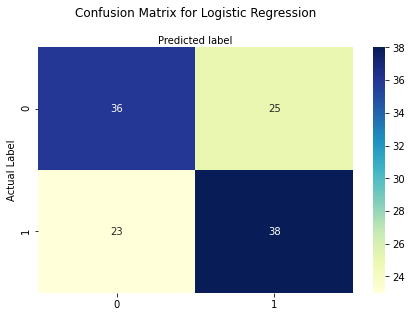

In [36]:
# name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(y))
plt.xticks(tick_marks, y)
plt.yticks(tick_marks, y)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_lr), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix for Logistic Regression', y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted label')
#Riley Dallas's Classification MetricII lecture

In [37]:
print("Accuracy:",metrics.accuracy_score(y, lrpredictions))
print("Precision:",metrics.precision_score(y, lrpredictions))
print("Recall:",metrics.recall_score(y, lrpredictions))
print("F1 Score:", metrics.f1_score(y, lrpredictions))

Accuracy: 0.6065573770491803
Precision: 0.6031746031746031
Recall: 0.6229508196721312
F1 Score: 0.6129032258064517


In [38]:
cnf_matrix_knn=metrics.confusion_matrix(y, knnpredictions)
cnf_matrix_knn
#Riley Dallas's Classification MetricII lecture

array([[35, 26],
       [25, 36]])

Text(0.5, 257.44, 'Predicted label')

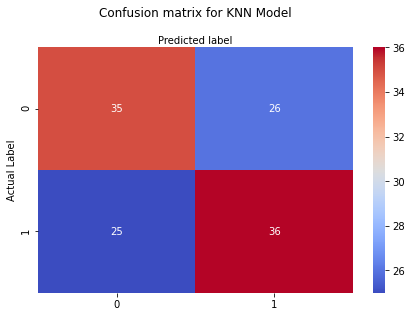

In [39]:
# name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(y))
plt.xticks(tick_marks, y)
plt.yticks(tick_marks, y)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_knn), annot=True, cmap="coolwarm" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for KNN Model', y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted label')
#Riley Dallas's Classification MetricII lecture

In [40]:
print("Accuracy:",metrics.accuracy_score(y, knnpredictions))
print("Precision:",metrics.precision_score(y, knnpredictions))
print("Recall:",metrics.recall_score(y, knnpredictions))
print("F1 Score:", metrics.f1_score(y, knnpredictions))

Accuracy: 0.5819672131147541
Precision: 0.5806451612903226
Recall: 0.5901639344262295
F1 Score: 0.5853658536585366


In [41]:
cnf_matrix_rf=metrics.confusion_matrix(y, rfpredictions)
cnf_matrix_rf
#Riley Dallas's Classification MetricII lecture

array([[34, 27],
       [24, 37]])

Text(0.5, 257.44, 'Predicted')

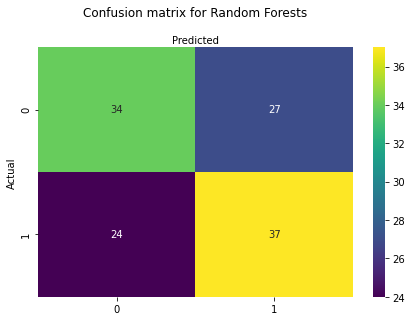

In [42]:
# name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(y))
plt.xticks(tick_marks, y)
plt.yticks(tick_marks, y)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_rf), annot=True, cmap="viridis" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for Random Forests', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')
#Riley Dallas's Classification MetricII lecture

In [43]:
print("Accuracy:",metrics.accuracy_score(y, rfpredictions))
print("Precision:",metrics.precision_score(y, rfpredictions))
print("Recall:",metrics.recall_score(y, rfpredictions))
print("F1 Score:", metrics.f1_score(y, rfpredictions))

Accuracy: 0.5819672131147541
Precision: 0.578125
Recall: 0.6065573770491803
F1 Score: 0.592


In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.1, random_state=33)

In [45]:
X.shape

(122, 7)

In [46]:
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

In [47]:
model = Sequential()
model.add(Dense(16,
                activation='relu',
                input_shape=(7,)))

#model will predict probability betwee .0 to 1
#1 neuron, sigmoid turns into probability
model.add(Dense(1, activation='sigmoid'))

In [48]:
# with accuracy as a metric
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy']) # optional param, great for classification# with accuracy as a metric


In [49]:
res= model.fit(X_train, y_train, epochs=100,
              batch_size=512,
              validation_data=(X_test_sc, y_test),
              verbose=0)#0 means don't print

In [50]:
res.history.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

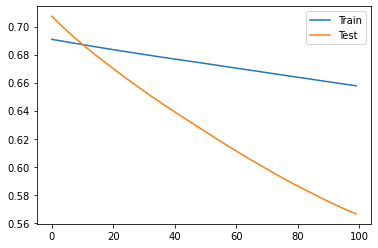

In [51]:
plt.plot(res.history['loss'], label='Train')
plt.plot(res.history['val_loss'], label='Test')
plt.legend();

In [53]:
nnpredictions_train= model.predict(X_train_sc)
nnpredictions_train=np.round(nnpredictions_train)


Text(0.5, 257.44, 'Predicted')

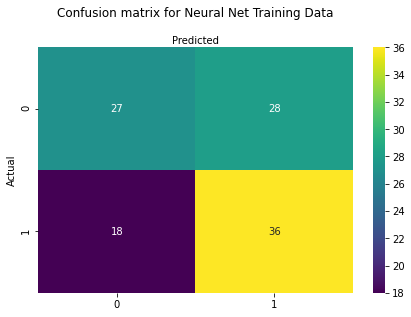

In [54]:
cnf_matrix_nn_train=metrics.confusion_matrix(y_train, nnpredictions_train)
cnf_matrix_nn_train
#Riley Dallas's Classification MetricII lecture
# name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(y))
plt.xticks(tick_marks, y)
plt.yticks(tick_marks, y)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_nn_train), annot=True, cmap="viridis" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for Neural Net Training Data', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')
#Riley Dallas's Classification MetricII lecture

In [55]:
print("Accuracy:",metrics.accuracy_score(y_train, nnpredictions_train))
print("Precision:",metrics.precision_score(y_train, nnpredictions_train))
print("Recall:",metrics.recall_score(y_train, nnpredictions_train))
print("F1 Score:", metrics.f1_score(y_train, nnpredictions_train))

Accuracy: 0.5779816513761468
Precision: 0.5625
Recall: 0.6666666666666666
F1 Score: 0.6101694915254238


In [56]:
nnpredictions_test= model.predict(X_test)
nnpredictions_test=np.round(nnpredictions_test)

Text(0.5, 257.44, 'Predicted')

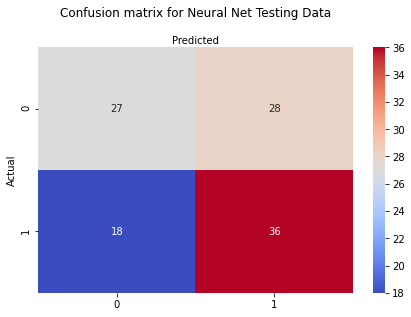

In [57]:

cnf_matrix_nn_test=metrics.confusion_matrix(y_test, nnpredictions_test)
cnf_matrix_nn_test
#Riley Dallas's Classification MetricII lecture
# name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(y))
plt.xticks(tick_marks, y)
plt.yticks(tick_marks, y)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_nn_train), annot=True, cmap="coolwarm" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for Neural Net Testing Data', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')
#Riley Dallas's Classification MetricII lecture

In [58]:
print("Accuracy:",metrics.accuracy_score(y_test, nnpredictions_test))
print("Precision:",metrics.precision_score(y_test, nnpredictions_test))
print("Recall:",metrics.recall_score(y_test, nnpredictions_test))
print("F1 Score:", metrics.f1_score(y_test, nnpredictions_test))

Accuracy: 0.7692307692307693
Precision: 0.8333333333333334
Recall: 0.7142857142857143
F1 Score: 0.7692307692307692


In [59]:
dftest2021WK1= pd.read_csv('./Data/2021_Week1.test.2020endinputs.csv')

In [60]:
# features=['TotalDVOAteam1', 'WeightedDVOAteam1','Offense DVOAteam1', 'OffenseWeightedDVOAteam1', 'DefenseDVOAteam1',
# 'DefenseWeightedDVOAteam1', 'Special Teams DVOA', 'SpecialTeamsWeightedDVOAteam1', 'Total DVOA',
# 'Weighted DVOA Rank', 'Weighted DVOA', 'Offense DVOA Rank',
# 'Offense DVOA', 'Offense Weighted DVOA', 'Defense DVOA',
# 'Defense Weighted DVOA', 'Special Teams DVOA.1',
# 'Special Teams Weighted DVOA', 'Home 1st team']
features=['OffenseWeightedDVOAteam1', 'DefenseWeightedDVOAteam1', 'SpecialTeamsWeightedDVOAteam1', 'Offense Weighted DVOA', 'Defense Weighted DVOA', 'Special Teams Weighted DVOA', 'Home 1st team']

target='W-L'

Xvalidation1=dftest2021WK1[features]
#No y as the first of NFL starts-predictions made prior to games

In [61]:

lr.fit(X, y)
knn.fit(X,y)
rf.fit(X,y)
ss = StandardScaler()
Xvalidation1_sc = ss.fit_transform(Xvalidation1)

In [62]:
lrpred1 = lr.predict(Xvalidation1)
knnpred1 = knn.predict(Xvalidation1)
rfpred1 = rf.predict(Xvalidation1)
nnpred1= model.predict(Xvalidation1)

In [63]:
dftest2021WK1.columns

Index(['Team', 'W-L', 'TotalDVOARankteam1', 'TotalDVOAteam1',
       'WeightedDVOARankteam1', 'WeightedDVOAteam1', 'OffenseDVOARankteam1',
       'Offense DVOAteam1', 'OffenseWeightedDVOARankteam1',
       'OffenseWeightedDVOAteam1', 'DefenseDVOARankteam1', 'DefenseDVOAteam1',
       'DefenseWeightedDVOARankteam1', 'DefenseWeightedDVOAteam1',
       'SpecialTeamsDVOARankteam1', 'Special Teams DVOA',
       'SpecialTeamsWeightedDVOARankteam1', 'SpecialTeamsWeightedDVOAteam1',
       'Team 2', 'W-L.1', 'Total DVOA Rank', 'Total DVOA',
       'Weighted DVOA Rank', 'Weighted DVOA', 'Offense DVOA Rank',
       'Offense DVOA', 'Offense Weighted DVOA Rank', 'Offense Weighted DVOA',
       'Defense DVOA Rank', 'Defense DVOA', 'Defense Weighted DVOA Rank',
       'Defense Weighted DVOA', 'Special Teams DVOA Rank',
       'Special Teams DVOA.1', 'Special Teams Weighted DVOA Rank',
       'Special Teams Weighted DVOA', 'Home 1st team'],
      dtype='object')

In [64]:


dfbet=dftest2021WK1[['Team']]
dfbet['LR Predictions']= lrpred1
dfbet['KNN Predictions']=knnpred1
dfbet['RF Predictions']=rfpred1
dfbet['NN Predictions']=np.round(nnpred1)
dfbet['Other Team']=dftest2021WK1[['Team 2']]
dfbet

<ipython-input-64-8e4e9ac8b243>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfbet['LR Predictions']= lrpred1
<ipython-input-64-8e4e9ac8b243>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfbet['KNN Predictions']=knnpred1
<ipython-input-64-8e4e9ac8b243>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/index

,Team,LR Predictions,KNN Predictions,RF Predictions,NN Predictions,Other Team
0,NO,0.0,1.0,0.0,0.0,GB
1,TB,1.0,0.0,1.0,1.0,DAL
2,GB,1.0,0.0,1.0,1.0,NO
3,BUF,1.0,0.0,1.0,1.0,PIT
4,SEA,1.0,1.0,1.0,1.0,IND
5,KC,1.0,0.0,1.0,0.0,CLE
6,BAL,1.0,1.0,1.0,1.0,LV
7,PIT,0.0,1.0,0.0,0.0,BUF
8,LAR,0.0,1.0,0.0,0.0,CHI
9,IND,0.0,0.0,0.0,0.0,SEA
